# 8. XGBoost Regression

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

## Process Normalized Data Without PCA

### Load train and test data

In [13]:
# train_file = 'house-prices-advanced-regression-techniques/train_normalized.csv'
train_file = 'house-prices-advanced-regression-techniques/train_numeric.csv'

train_df = pd.read_csv(train_file)

# test_file = 'house-prices-advanced-regression-techniques/test_normalized.csv'
test_file = 'house-prices-advanced-regression-techniques/test_numeric.csv'
test_df = pd.read_csv(test_file)

### Train model on the train data and predict the test data

In [14]:
X = train_df.drop(['SalePrice'], axis=1)
Y = train_df['SalePrice']
xg_reg = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, min_child_weight=4,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X,Y)

Y_pred = xg_reg.predict(test_df)
print(Y_pred)
print(Y_pred.shape)

[ 82983.875  98104.61  130473.66  ... 103975.414  78380.664 147856.39 ]
(1459,)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


### Selecting the most important features and train again on those

[1.05569065e-02 0.00000000e+00 2.47345120e-02 0.00000000e+00
 0.00000000e+00 1.56817779e-01 1.60449445e-02 0.00000000e+00
 9.26420651e-03 0.00000000e+00 1.57221649e-02 3.66317183e-02
 3.77787203e-02 0.00000000e+00 3.26946168e-03 1.38830151e-02
 5.41315712e-02 8.48846789e-03 2.79513970e-02 0.00000000e+00
 1.53769820e-03 0.00000000e+00 7.28731102e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.35509891e-03 0.00000000e+00
 1.47769287e-01 8.90363008e-03 0.00000000e+00 1.01793138e-03
 0.00000000e+00 3.56284226e-03 4.21940126e-02 1.17562467e-03
 0.00000000e+00 0.00000000e+00 1.42085508e-01 8.71219614e-04
 2.85733826e-02 3.68467998e-03 3.12249199e-03 1.07144611e-02
 0.00000000e+00 8.98200320e-04 7.15984777e-02 6.14424527e-04
 2.32856590e-02 1.46336835e-02 3.42492852e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.00934042e-03
 0.00000000e+00 5.26116695e-04 5.20092575e-03 0.00000000e+00
 3.00631812e-03 0.00000000e+00 0.00000000e+00 2.69042182e-04
 0.00000000e+00 1.416391

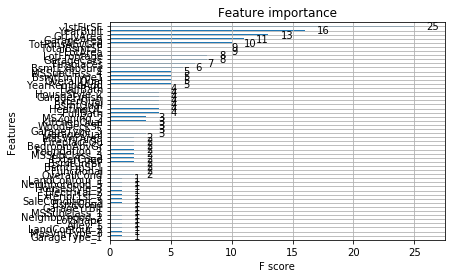

In [15]:
print(xg_reg.feature_importances_)
plot_importance(xg_reg)
plt.show()


In [22]:
thresholds = np.sort(xg_reg.feature_importances_)[::-1]
print(thresholds)
print(X.shape)
X = X.astype(float).dropna()
print(X.shape)
Y = Y.loc[X.index]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xg_reg, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    select_X_test = selection.transform(X_test)
    # train model
    selection_model = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, min_child_weight=4,
                max_depth = 5, alpha = 10, n_estimators = 10)
    selection_model.fit(select_X_train, y_train)
    # eval model
    
    y_pred = selection_model.predict(select_X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print("Thresh=%.3f, n=%d, RMSE: %.2f" % (thresh, select_X_train.shape[1], rmse))

[1.56817779e-01 1.47769287e-01 1.42085508e-01 7.15984777e-02
 5.41315712e-02 4.21940126e-02 3.77787203e-02 3.66317183e-02
 2.85733826e-02 2.79513970e-02 2.47345120e-02 2.32856590e-02
 1.60449445e-02 1.57221649e-02 1.46336835e-02 1.41639160e-02
 1.38830151e-02 1.07144611e-02 1.06595745e-02 1.05569065e-02
 9.78467427e-03 9.26420651e-03 8.90363008e-03 8.48846789e-03
 8.15439597e-03 7.80063821e-03 5.20092575e-03 4.00934042e-03
 3.68467998e-03 3.56284226e-03 3.42492852e-03 3.26946168e-03
 3.12249199e-03 3.06672766e-03 3.00631812e-03 2.25926260e-03
 1.53769820e-03 1.43546821e-03 1.35509891e-03 1.17562467e-03
 1.01793138e-03 8.98200320e-04 8.71219614e-04 8.20109970e-04
 8.05791875e-04 7.28731102e-04 6.14424527e-04 5.26116695e-04
 4.45847079e-04 4.41623706e-04 2.69042182e-04 1.23357997e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

Thresh=0.016, n=14, RMSE: 82590.13
Thresh=0.015, n=15, RMSE: 82417.68
Thresh=0.014, n=16, RMSE: 82404.33
Thresh=0.014, n=17, RMSE: 80455.44
Thresh=0.011, n=18, RMSE: 81595.41
Thresh=0.011, n=19, RMSE: 81652.32
Thresh=0.011, n=20, RMSE: 80171.09
Thresh=0.010, n=21, RMSE: 80406.03
Thresh=0.009, n=22, RMSE: 81121.52
Thresh=0.009, n=23, RMSE: 81679.98
Thresh=0.008, n=24, RMSE: 81289.72
Thresh=0.008, n=25, RMSE: 81000.99


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

Thresh=0.008, n=26, RMSE: 81067.22
Thresh=0.005, n=27, RMSE: 81435.83
Thresh=0.004, n=28, RMSE: 81257.17
Thresh=0.004, n=29, RMSE: 81621.96
Thresh=0.004, n=30, RMSE: 81393.04
Thresh=0.003, n=31, RMSE: 81876.25
Thresh=0.003, n=32, RMSE: 79914.65
Thresh=0.003, n=33, RMSE: 81649.46
Thresh=0.003, n=34, RMSE: 80599.08
Thresh=0.003, n=35, RMSE: 80728.86
Thresh=0.002, n=36, RMSE: 80969.45


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

Thresh=0.002, n=37, RMSE: 81576.92
Thresh=0.001, n=38, RMSE: 81645.33
Thresh=0.001, n=39, RMSE: 82069.51
Thresh=0.001, n=40, RMSE: 81610.69
Thresh=0.001, n=41, RMSE: 80882.33
Thresh=0.001, n=42, RMSE: 81179.73
Thresh=0.001, n=43, RMSE: 80479.70
Thresh=0.001, n=44, RMSE: 81132.97
Thresh=0.001, n=45, RMSE: 82146.36
Thresh=0.001, n=46, RMSE: 80519.35


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

Thresh=0.001, n=47, RMSE: 80650.23
Thresh=0.001, n=48, RMSE: 81107.96
Thresh=0.000, n=49, RMSE: 81209.90
Thresh=0.000, n=50, RMSE: 81554.66
Thresh=0.000, n=51, RMSE: 81382.45
Thresh=0.000, n=52, RMSE: 81121.32
Thresh=0.000, n=128, RMSE: 81862.44


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

Thresh=0.000, n=128, RMSE: 81862.44
Thresh=0.000, n=128, RMSE: 81862.44


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [24]:
thresh = 0.029

selection = SelectFromModel(xg_reg, threshold=thresh, prefit=True)
select_X_train = selection.transform(X)

for feature in test_df:
    test_df[feature].fillna((X[feature].mean()), inplace=True)

select_X_test = selection.transform(test_df)
print(select_X_train.shape)
print(select_X_test.shape)

# train model
selection_model = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, min_child_weight=4,
            max_depth = 5, alpha = 10, n_estimators = 10)
selection_model.fit(select_X_train, Y)
Y_pred = selection_model.predict(select_X_test)

(1121, 8)
(1459, 8)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


### Save results

In [25]:
original_test_file = 'house-prices-advanced-regression-techniques/test.csv'
original_test_df = pd.read_csv(original_test_file)
id_col = original_test_df['Id']
result_df = pd.concat([id_col, pd.DataFrame(Y_pred, columns=['SalePrice'])], axis=1)
result_df.to_csv('XGBoost_reg_WO_PCA_Important_Features.csv', index=False)

## Improving the results by using Grid Search

### List of parameters and their possible changes as the input for Grid Search

In [ ]:
# A parameter grid for XGBoost
params = {'min_child_weight':[4,5],
          'gamma':[i/10.0 for i in range(3,6)],
          'subsample':[i/10.0 for i in range(6,11)],
          'colsample_bytree':[i/10.0 for i in range(6,11)],
          'max_depth': [2,3,4,5,6],
         'learning_rate': [0.01, 0.05, 0.1, 0.15, 0,2],
          'n_estimators' :[1, 10, 50, 100],
         }

### Initialize XGB and GridSearch

In [ ]:
X = train_df.drop(['SalePrice'], axis=1)
Y = train_df['SalePrice']


xgb = XGBRegressor(objective ='reg:squarederror')
grid = RandomizedSearchCV(xgb, params)
grid.fit(X, Y)
# grid.get_params
print(grid.best_params_)

### Train the XGBoost again, this time with the best hyper-parameters

In [ ]:
xgb = XGBRegressor(objective ='reg:squarederror', **grid.best_params_)
xgb.fit(X,Y)
Y_pred = xg_reg.predict(test_df)

### Save results

In [ ]:
original_test_file = 'house-prices-advanced-regression-techniques/test.csv'
original_test_df = pd.read_csv(original_test_file)
id_col = original_test_df['Id']
result_df = pd.concat([id_col, pd.DataFrame(Y_pred, columns=['SalePrice'])], axis=1)
result_df.to_csv('XGBoost_rand_search_WO_PCA.csv', index=False)

## Process Normalized Data With PCA

### Load train and test data

In [ ]:
train_file = 'house-prices-advanced-regression-techniques/train_dim_reduced.csv'
train_df = pd.read_csv(train_file)

test_file = 'house-prices-advanced-regression-techniques/test_dim_reduced.csv'
test_df = pd.read_csv(test_file)

### Train model on the train data and predict the test data

In [ ]:
X = train_df.drop(['SalePrice'], axis=1)
Y = train_df['SalePrice']
xg_reg = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X,Y)
Y_pred = xg_reg.predict(test_df)
print(Y_pred)
print(Y_pred.shape)

### Save results

In [ ]:
original_test_file = 'house-prices-advanced-regression-techniques/test.csv'
original_test_df = pd.read_csv(original_test_file)
id_col = original_test_df['Id']
result_df = pd.concat([id_col, pd.DataFrame(Y_pred, columns=['SalePrice'])], axis=1)
result_df.to_csv('XGBoost_reg_W_PCA.csv', index=False)